In [40]:
import numpy as np, pandas as pd
from glob import glob
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
tables = glob('bright_*')

In [34]:
dfs = []
for t in tables:
    temp = pd.read_csv(t)
    dfs.append(temp)
    
result = pd.concat(dfs)

In [45]:
M_G = result['phot_g_mean_mag'] + 5 * np.log10(result['parallax']) - 10 - result['a_g_val']
result['M_G'] = M_G
len(result)

7609483

In [27]:
for col,dt in zip(result.columns,result.dtypes):
    if (dt != object):
        if np.any(np.isnan(result[col])):
            print(col)

w1mpro_error
w2mpro
w2mpro_error


In [49]:
good_cond = (
    (~np.isnan(result['w1mpro_error'])) & 
    (~np.isnan(result['w2mpro_error'])) & 
    (~np.isnan(result['w2mpro'])) &
    (result['w1mpro_error']/result['w1mpro'] <= 0.01) &
    (result['w2mpro_error']/result['w2mpro'] <= 0.01)
)
             
good = result[good_cond]
blue_cond = (good['phot_bp_mean_mag']-good['phot_rp_mean_mag'] <= 2)
blue = good[blue_cond]
lum_cond = (good['M_G'] <= -1)
lum = good[lum_cond]
print(len(good),len(blue),len(lum))

7431091 3850178 3086803


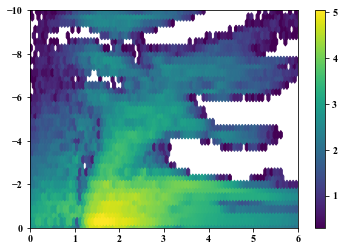

In [43]:
plt.hexbin(good['phot_bp_mean_mag']-good['phot_rp_mean_mag'],good['M_G'],mincnt=1,bins='log')

plt.xlim(0,6)
plt.ylim(0,-10)
plt.colorbar()

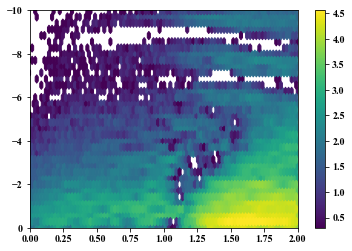

In [44]:
plt.hexbin(blue['phot_bp_mean_mag']-blue['phot_rp_mean_mag'],blue['M_G'],mincnt=1,bins='log')

plt.xlim(0,2)
plt.ylim(0,-10)
plt.colorbar()

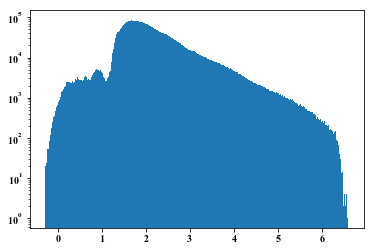

In [58]:
plt.hist(good['phot_bp_mean_mag']-good['phot_rp_mean_mag'],bins=500);
plt.yscale('log')

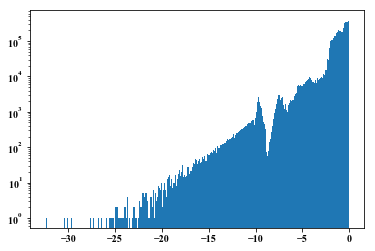

In [57]:
plt.hist(good['M_G'],bins=500);
plt.yscale('log')

Text(0,0.5,'N')

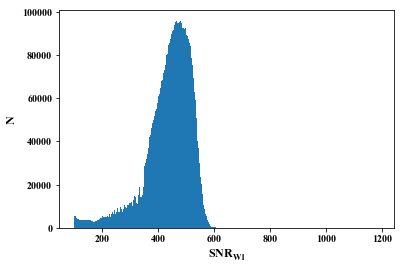

In [62]:
plt.hist(good['w1mpro']/good['w1mpro_error'],bins=500);
plt.xlabel('SNR$_{W1}$')
plt.ylabel('N')

Text(0,0.5,'N')

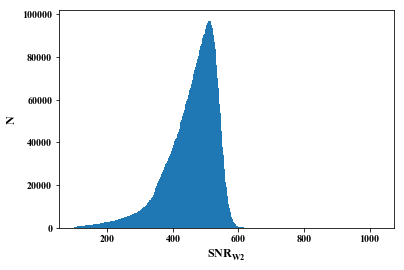

In [68]:
plt.hist(good['w2mpro']/good['w2mpro_error'],bins=500);
plt.xlabel('SNR$_{W2}$')
plt.ylabel('N')

In [66]:
w1w2 = good['w1mpro'] - good['w2mpro']
w1w2_err = np.sqrt(good['w1mpro_error']*good['w1mpro_error'] + good['w2mpro_error']*good['w2mpro_error'])

Text(0,0.5,'N')

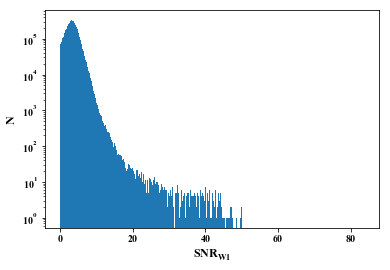

In [74]:
plt.hist(np.abs(w1w2)/w1w2_err,bins=500);
plt.yscale('log')
plt.xlabel('SNR$_{W1}$')
plt.ylabel('N')

In [78]:
good_color = good[w1w2/w1w2_err > 3]

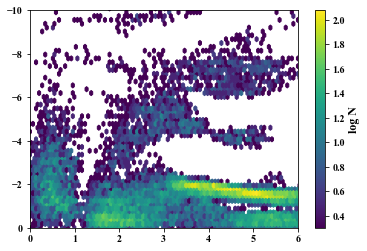

In [82]:
plt.hexbin(good_color['phot_bp_mean_mag']-good_color['phot_rp_mean_mag'],good_color['M_G'],mincnt=1,bins='log')

plt.xlim(0,6)
plt.ylim(0,-10)
plt.colorbar(label='log N')
plt.savefig('good_color_CMD.png')

In [83]:
good_color.to_csv('bright_clean_w1w2_gt3.csv.gz',index=False,compression='gzip')

In [90]:
from astropy.table import Table
good_ids = Table.from_pandas(pd.DataFrame(good['source_id']))

In [92]:
good_ids.write('cleaned_sourceids.vot', table_id='cleaned_sourceids', format='votable')